In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import pydot

import pickle
import os
from sklearn.utils import shuffle

Using TensorFlow backend.


In [ ]:
train_images = pickle.load( open( "../imagenet-200-224/train_images.pkl", "rb" ) )
train_labels = pickle.load( open( "../imagenet-200-224/train_labels.pkl", "rb" ) )
val_images = pickle.load( open( "../imagenet-200-224/val_images.pkl", "rb" ) )
val_labels = pickle.load( open( "../imagenet-200-224/val_labels.pkl", "rb" ) )
y_train = pickle.load( open( "../imagenet-200/y_train.pkl", "rb" ) )
y_test = pickle.load( open( "../imagenet-200/y_test.pkl", "rb" ) )

text_labels = pd.read_csv('../imagenet-200/map_clsloc.txt', sep='\s', header=None, engine='python')
text_labels.columns=['label', 'id', 'description']
text_labels.head()

In [ ]:
text_labels.count()

In [1]:
train_images.shape

NameError: name 'train_images' is not defined

In [16]:
type(train_images[0][0][0][0])

numpy.uint8

In [17]:
# [image_index][R][G][B]
train_images[1200][0][0][2]

176

In [ ]:
train_images = train_images.astype('float32')
val_images = val_images.astype('float32')

# beacuse pixel values are between 0 to 255
train_images /= 255
val_images /= 255

train_images, train_labels, y_train = shuffle(train_images, train_labels, y_train, random_state=41)

In [8]:
train_images.shape

(100000, 32, 32, 3)

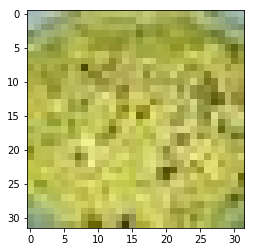

         label   id description
812  n07583066  813   guacamole


In [9]:
plotData = train_images[0]
plt.imshow(plotData)
plt.show()
print(text_labels.loc[text_labels['label']==train_labels[0]])

In [10]:
model = Sequential()

model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

model.add(Flatten())
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(1000))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(17))
model.add(Activation('softmax'))

model.summary()

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=["accuracy"])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
activation_1 (Activation)    (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
activation_2 (Activation)    (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 384)         885120    
__________

In [11]:
batch_size = 128
epochs = 20
history_start = model.fit(train_images, train_labels,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(val_images, val_labels))

ValueError: Error when checking input: expected conv2d_1_input to have shape (224, 224, 3) but got array with shape (32, 32, 3)